In [185]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy import stats
import torch
import torch.nn.functional as F
import time
from datetime import datetime
import pickle

from networks import Dueling_ADRQN
from nn_agents import Dueling_ADRQN_Agent
import parameters as pars
import nn_run_functions as nrf
import visualization as vis


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
D = Dueling_ADRQN_Agent()
sum(p.numel() for p in D.network.parameters())

57195

In [ ]:
best_LCC = 1e5 
current_run = 0
best_agent = Dueling_ADRQN_Agent()

weight_decay = np.linspace(0, 0.5, 5)
max_epsilon = np.linspace(0.0, 0.4, 5)
lr_step_size = np.linspace(1, 5, 5)
lr_gamma = np.linspace(0.6, 1, 5)

total_runs = len(weight_decay)*len(max_epsilon)*len(lr_step_size)*len(lr_gamma)

for k in weight_decay:
    for l in max_epsilon:
        for m in lr_step_size:
            for n in lr_gamma:
                print(f"\n\nCurrent run: {current_run} out of {total_runs}!")
    
                network_params = {'n_obs': 1, 
                                  'n_actions': 4, 
                                  'weight_decay': k,
                                  'lrelu_slope': 0.3,
                                  'lr_step_size': int(m),
                                  'lr_gamma': n,
                                  'maximize': False}

                agent_params = {'measurement_error': 350,
                                'epochs': 200, 
                                'batch_size': 200,
                                'max_epsilon': l,
                                'dec_epsilon': 0.1,
                                'min_epsilon': 0,
                                'NN_parameters': network_params}
            
                D = Dueling_ADRQN_Agent(**agent_params)
                D.learn()
                D.network.load_checkpoint()
                LCC = D.test(int(5e5), int(1e4))

                if LCC < best_LCC:
                    best_LCC = LCC
                    best_agent.__dict__ = D.__dict__
                    best_agent.network.load_state_dict(D.network.state_dict())
                    assert (best_agent.network.act_fc1.weight == D.network.act_fc1.weight).all()
                    assert (best_agent.network.lstm.weight_hh_l0 == D.network.lstm.weight_hh_l0).all()
                    print("\n\n\n Best model so far: ", D.network.name)
                    print("with LCC: ", LCC)
                    print("with params: ", agent_params)
                
                current_run += 1

nrf.save_agent(best_agent)

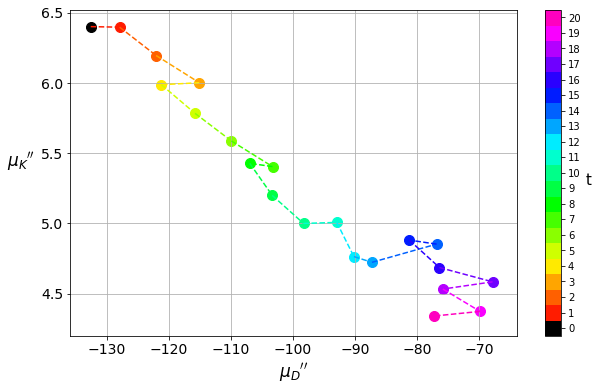

In [121]:
vis.single_belief_trajectory(bel1, colormap='gist_rainbow', index=3, save=False)

(-203.86162384573024, 11.207598057495623) (1.2432011751309193, 11.632184017122547)


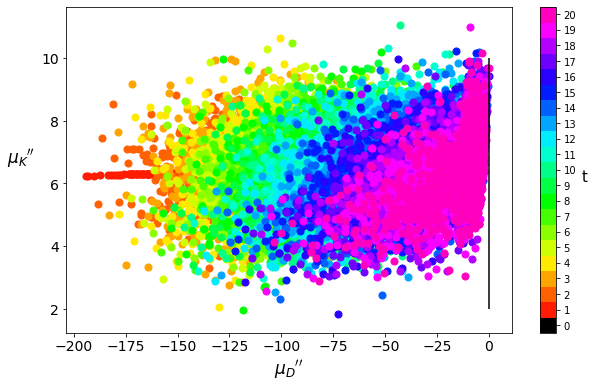

In [13]:
vis.belief_progress(bel, 'gist_rainbow', save=False)